# Import required Libraries

In [58]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score

# UPLOAD DATASET AND HIGHLIGHT TOP 5

In [119]:
df = pd.read_csv(r"C:\Users\91970\Downloads\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Perform EDA

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     500 non-null    object
 1   sentiment  500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [121]:
df.shape

(500, 2)

In [123]:
df['sentiment'].value_counts().reset_index()

,sentiment,count
0,negative,263
1,positive,237


# Encode/Replace sentiment data

In [125]:
df['sentiment'].replace({"positive" :1, "negative": 0}, inplace = True)
df['sentiment'].reset_index()

,index,sentiment
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
495,495,0
496,496,0
497,497,0
498,498,0


# Adding New Columns:

In [133]:
df['review_len'] = df['review'].astype(str).apply(len)
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
df['psd_review'] = df['review'].astype(str)
df                                

,review,sentiment,review_len,word_count,psd_review
0,One of the other reviewers has mentioned that ...,1,1725,301,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...,1,962,156,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,1,902,162,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,712,132,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1214,198,"""American Nightmare"" is officially tied, in my..."
496,"First off, I have to say that I loved the book...",0,880,167,"First off, I have to say that I loved the book..."
497,This movie was extremely boring. I only laughe...,0,780,144,This movie was extremely boring. I only laughe...
498,I was disgusted by this movie. No it wasn't be...,0,1159,211,I was disgusted by this movie. No it wasn't be...


# Histogram via matplot¶

,review,sentiment,review_len,word_count,psd_review
0,One of the other reviewers has mentioned that ...,1,1725,301,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...,1,962,156,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,1,902,162,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,712,132,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1214,198,"""American Nightmare"" is officially tied, in my..."
496,"First off, I have to say that I loved the book...",0,880,167,"First off, I have to say that I loved the book..."
497,This movie was extremely boring. I only laughe...,0,780,144,This movie was extremely boring. I only laughe...
498,I was disgusted by this movie. No it wasn't be...,0,1159,211,I was disgusted by this movie. No it wasn't be...


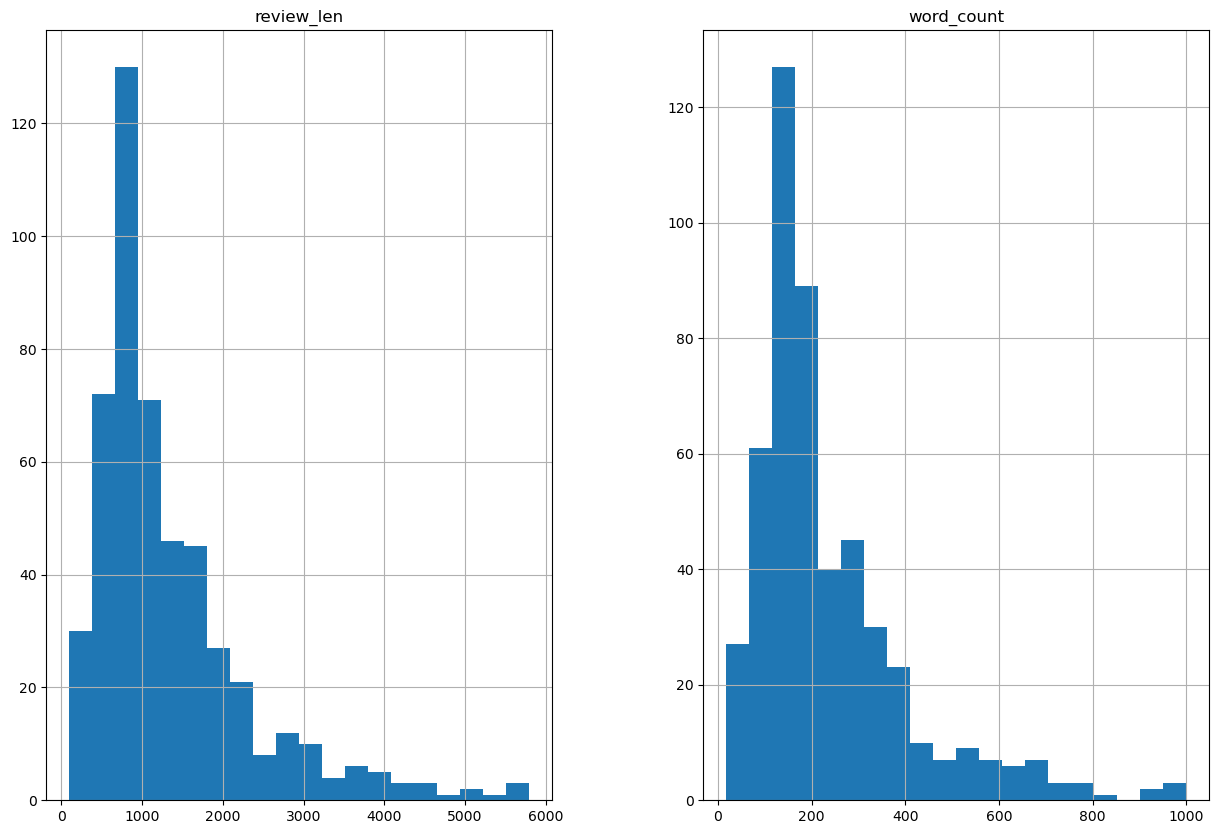

In [134]:
df[['review_len','word_count']].hist(bins=20, figsize=(15,10))
df

# FUNCTION TO CLEAN UP

In [7]:
def convert_lower(psd_review):
    return psd_review.lower()

In [8]:
df['psd_review'] = df['psd_review'].apply(convert_lower)
df['psd_review']

0      one of the other reviewers has mentioned that ...
1      a wonderful little production. the filming tec...
2      i thought this was a wonderful way to spend ti...
3      basically there's a family where a little boy ...
4      petter mattei's "love in the time of money" is...
                             ...                        
495    "american nightmare" is officially tied, in my...
496    first off, i have to say that i loved the book...
497    this movie was extremely boring. i only laughe...
498    i was disgusted by this movie. no it wasn't be...
499    such a joyous world has been created for us in...
Name: psd_review, Length: 500, dtype: object

In [9]:
df

,review,sentiment,review_len,word_count,psd_review
0,One of the other reviewers has mentioned that ...,1,1725,301,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...,1,962,156,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,1,902,162,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,712,132,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,"petter mattei's ""love in the time of money"" is..."
...,...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1214,198,"""american nightmare"" is officially tied, in my..."
496,"First off, I have to say that I loved the book...",0,880,167,"first off, i have to say that i loved the book..."
497,This movie was extremely boring. I only laughe...,0,780,144,this movie was extremely boring. i only laughe...
498,I was disgusted by this movie. No it wasn't be...,0,1159,211,i was disgusted by this movie. no it wasn't be...


In [10]:
def remove_special(psd_review):
    x = ''
    
    for i in psd_review:
        if i.isalnum():
            x = x+i
        else:
            x=x+' '
    return x

In [11]:
df['psd_review'] = df['psd_review'].apply(remove_special)
df['psd_review']

0      one of the other reviewers has mentioned that ...
1      a wonderful little production  the filming tec...
2      i thought this was a wonderful way to spend ti...
3      basically there s a family where a little boy ...
4      petter mattei s  love in the time of money  is...
                             ...                        
495     american nightmare  is officially tied  in my...
496    first off  i have to say that i loved the book...
497    this movie was extremely boring  i only laughe...
498    i was disgusted by this movie  no it wasn t be...
499    such a joyous world has been created for us in...
Name: psd_review, Length: 500, dtype: object

In [12]:
df

,review,sentiment,review_len,word_count,psd_review
0,One of the other reviewers has mentioned that ...,1,1725,301,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...,1,962,156,a wonderful little production the filming tec...
2,I thought this was a wonderful way to spend ti...,1,902,162,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,712,132,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,petter mattei s love in the time of money is...
...,...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1214,198,american nightmare is officially tied in my...
496,"First off, I have to say that I loved the book...",0,880,167,first off i have to say that i loved the book...
497,This movie was extremely boring. I only laughe...,0,780,144,this movie was extremely boring i only laughe...
498,I was disgusted by this movie. No it wasn't be...,0,1159,211,i was disgusted by this movie no it wasn t be...


In [13]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()



In [17]:
df['psd_review'] = df['psd_review'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() if word not in stopwords.words('english')]))
df['psd_review']

0      one review mention watch 1 oz episod hook righ...
1      wonder littl product film techniqu unassum old...
2      thought wonder way spend time hot summer weeke...
3      basic famili littl boy jake think zombi closet...
4      petter mattei love time money visual stun film...
                             ...                        
495    american nightmar offici tie opinion pat worst...
496    first say love book anim farm read 9th grade c...
497    movi extrem bore laugh time decid rent notic w...
498    disgust movi graphic sex scene ruin imag artem...
499    joyou world creat us pixar bug life immer univ...
Name: psd_review, Length: 500, dtype: object

In [18]:
df

,review,sentiment,review_len,word_count,psd_review
0,One of the other reviewers has mentioned that ...,1,1725,301,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. The filming tec...,1,962,156,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,1,902,162,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,712,132,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,petter mattei love time money visual stun film...
...,...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1214,198,american nightmar offici tie opinion pat worst...
496,"First off, I have to say that I loved the book...",0,880,167,first say love book anim farm read 9th grade c...
497,This movie was extremely boring. I only laughe...,0,780,144,movi extrem bore laugh time decid rent notic w...
498,I was disgusted by this movie. No it wasn't be...,0,1159,211,disgust movi graphic sex scene ruin imag artem...


# Cleaned data with new counts

In [19]:
df['psd_review_len'] = df['psd_review'].astype(str).apply(len)
df['psd_word_count'] = df['psd_review'].apply(lambda x: len(str(x).split()))

df


,review,sentiment,review_len,word_count,psd_review,psd_review_len,psd_word_count
0,One of the other reviewers has mentioned that ...,1,1725,301,one review mention watch 1 oz episod hook righ...,980,162
1,A wonderful little production. The filming tec...,1,962,156,wonder littl product film techniqu unassum old...,566,86
2,I thought this was a wonderful way to spend ti...,1,902,162,thought wonder way spend time hot summer weeke...,521,85
3,Basically there's a family where a little boy ...,0,712,132,basic famili littl boy jake think zombi closet...,393,66
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1269,222,petter mattei love time money visual stun film...,757,125
...,...,...,...,...,...,...,...
495,"""American Nightmare"" is officially tied, in my...",0,1214,198,american nightmar offici tie opinion pat worst...,703,119
496,"First off, I have to say that I loved the book...",0,880,167,first say love book anim farm read 9th grade c...,430,76
497,This movie was extremely boring. I only laughe...,0,780,144,movi extrem bore laugh time decid rent notic w...,389,67
498,I was disgusted by this movie. No it wasn't be...,0,1159,211,disgust movi graphic sex scene ruin imag artem...,581,92


# Draw Wordcloud of two sets

In [20]:
!pip install wordCloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

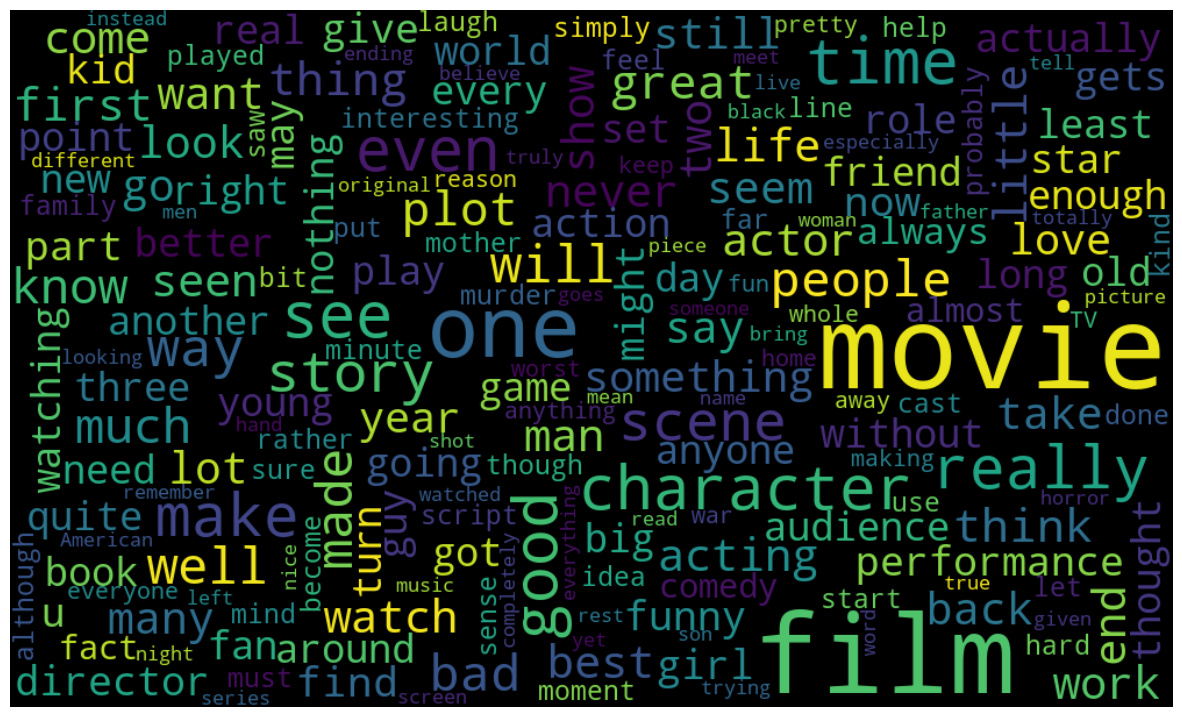

In [24]:
reviews = ' '.join(df['review'])
wordcloud = WordCloud(height = 600, width = 1000, max_font_size = 100, background_color='black').generate(reviews)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()


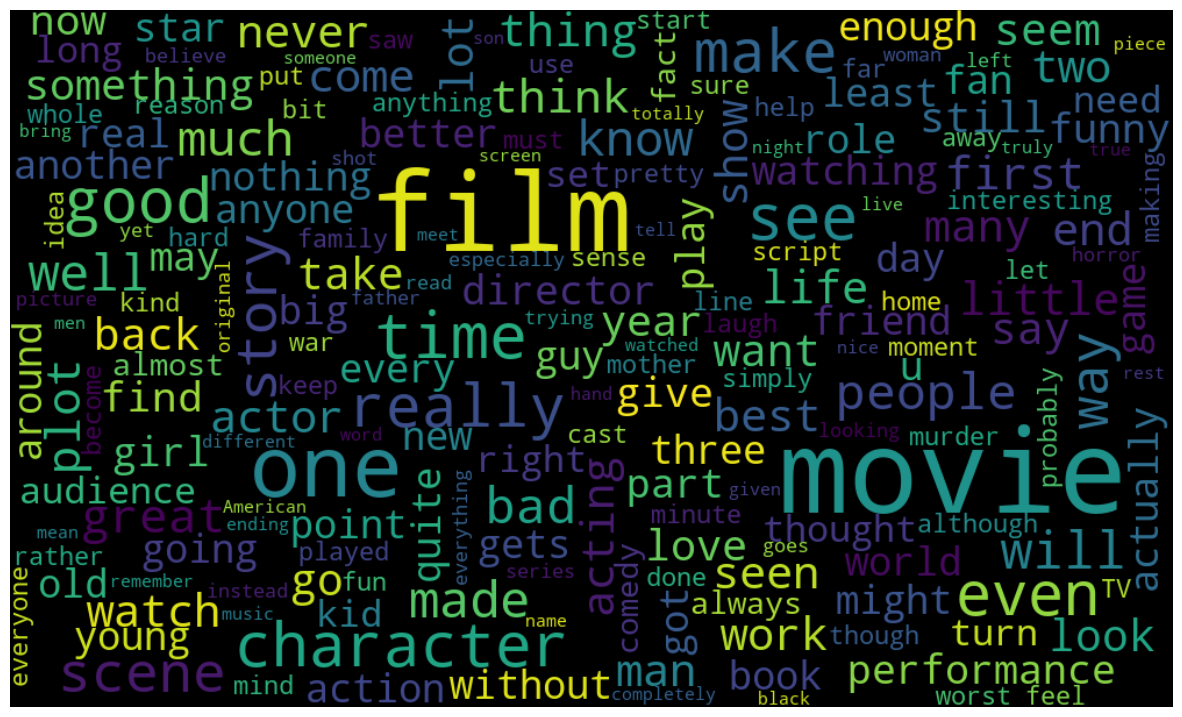

In [25]:
text = " ".join(df['psd_review'])
wordcl = WordCloud(height = 6000, max_font_size = 100, background_color='black').generate(text)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
X= df.iloc[:,0 :1].values

In [30]:
X.shape

(500, 1)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


In [67]:
cv = CountVectorizer(max_features=1000)

In [68]:
X= cv.fit_transform(df['review']).toarray()

In [69]:
X.shape #12648 are my unique words in reviews

(500, 1000)

In [70]:
X[0].max()

16

In [35]:
y = df.iloc[:, -1].values

In [36]:
y.shape

(500,)

In [38]:
y

array([162,  86,  85,  66, 125,  56,  75,  83,  64,  17,  49,  84, 225,
        50,  26,  71,  54, 110,  65,  62, 176,  87,  30, 166,  71,  62,
       267,  70,  58, 368, 244, 216,  56, 383, 110, 181,  37, 162,  55,
       137,  55, 122,  96, 142,  83, 109,  44,  74, 366,  62, 240, 316,
        92,  40, 107, 109, 106,  89, 307, 219,  73,  75,  38,  22, 108,
       158, 200,  67, 102, 160, 118, 135, 118,  90, 164,  70, 160, 291,
        81, 153,  80,  72, 134, 221,  34,  66, 142,  68, 107, 205,  81,
        83, 207, 101,  76, 137,  95,  74,  89, 272,  77, 378,  70, 208,
        89, 117,  50, 155, 102,  57,  70, 100,  19,  50, 143,  65, 171,
        44,  42, 140,  57,  86, 119,  82,  76,  60, 229,  69,  87,  72,
       103, 230,  70,  63, 103, 206,  56, 138, 144, 141, 228, 158, 234,
        45, 127, 145, 110, 167,  63, 151, 100,  92, 106, 108,  94,  47,
       455,  77,  72,  59,  26, 103,  28, 286, 192,  33,  61, 108,  48,
       183, 117,  79, 301, 223, 133, 140, 133, 459, 106, 121,  6

In [93]:
#X.y
#Training set
#Test Set(Already know the result)
X = df['psd_review']
y = df['sentiment']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [72]:
X_train.shape

(400, 1000)

In [73]:
X_test.shape

(100, 1000)

In [74]:
y_train.shape

(400,)

In [75]:
y_test.shape

(100,)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
clf1 = GaussianNB()
clf2 = MultinomialNB()


In [77]:
print(clf1.fit(X_train, y_train))
print(clf2.fit(X_train, y_train))


GaussianNB()
MultinomialNB()


In [78]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)


In [79]:
y_pred1.shape

(100,)

In [80]:
print("Gaussian", accuracy_score(y_test, y_pred1))
print("Multinomial",accuracy_score(y_test, y_pred2))

Gaussian 0.0
Multinomial 0.0


# Applying IfidfVectorizer

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)


In [98]:
X_train,X_test,y_train,y_test =  train_test_split(X_tfidf,y,test_size=0.2)

In [99]:
X_train

<400x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 35488 stored elements in Compressed Sparse Row format>

# Classification

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
clf = LogisticRegression()

In [102]:
clf.fit(X_train,y_train)

LogisticRegression()

# Evaluating Performance

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [106]:
y_pred = clf.predict(X_test)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8400


In [109]:
print('Classification Report:')
classification_report(y_test, y_pred, target_names=['0', '1'])

Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.78      0.94      0.85        50\n           1       0.93      0.74      0.82        50\n\n    accuracy                           0.84       100\n   macro avg       0.85      0.84      0.84       100\nweighted avg       0.85      0.84      0.84       100\n'